## Assignment 2 Regression
### CS450 Spring 2023

We will not use a grading script for this assignment, but the grading criteria is explained in the instructions.
If you are having issues with inconsistent results, try setting seeds. If you find a seed that works for you, keep it in your code so we can see the results you expect us to see when we look at your code.

## Step 1
**Save a copy in your Drive**

Student Name: Grant Wilson
<br>If you used pair programming..
<br>Programming Partner: Manuel Osuna


## Problem 1 (20 points)
### Simple Linear Regression
The purpose of this exercise is to implement a simple linear regression from scratch.
Do not use a library to implement it.
You will generate synthetic data using the linear equation y = 50x + 22
The synthetic data will have some random variation to make the problem interesting.
* Grading Criteria: The result of your regression should round to the orginal equation. It is not expected to be perfect.
* I have a sample notebook that I will be going over in class. That will get you 80% through problem 1

### Part 1 - Generate Data
1. Randomly select 20 X values between 0 and 100. Use a uniform distribution.
2. Calculate Y values using 50x + 22 + RANDOM_VARIATION
        2.1 The random variation is because we don't want it to be perfect
        2.2 Use a normal distribution with values between -1 and 1

In [ ]:
### Your code here
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0, 100, 20)
y = 50 * x + 22 + np.random.normal(-1, 1, 20)
print("X values: ", x)
print("Y values: ", y)

X values:  [92.33418702 19.62417532 91.45739532 60.27527093 81.89941793 32.83456054
 80.34666089 18.43310197 35.00370349 14.71341347 62.90831891 19.09345771
 87.48045821 21.29642944 43.27556732 77.69676054 83.74477537 61.29345757
 72.12201803 51.75125261]
Y values:  [4636.43352233 1001.66019697 4593.97009224 3035.45692567 4116.7809648
 1661.85048385 4036.73437574  942.86296408 1770.78063014  756.40979338
 3167.06526035  975.4485534  4395.49248323 1085.74536982 2185.03928884
 3905.70157889 4209.0287165  3084.2504844  3625.16071872 2609.70387174]


### Part 2 - Calculate Regression
Now that you have the data, calcualate the regression. Show your value for slope and intercept. Do not use an libraries to do it for you.
<BR>You have some random variance, so you probably won't get exactly y=50x+22 , but it should round to it.

In [ ]:
### Your code here
x_mean = np.mean(x)
y_mean = np.mean(y)

num = np.sum((x - x_mean) * (y - y_mean))
den = np.sum((x- x_mean) ** 2)
slope = num / den

intercept = y_mean - slope * x_mean

print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  49.99957948654015
Intercept:  20.841145025454807


### Part 3 - Visualization
Create a visualization
* Include a scatter plot of the data points
* Include the real line for y = 50x +22 in blue
* Include the regression line in red (they may overlap, that is ok)

<function matplotlib.pyplot.show(close=None, block=None)>

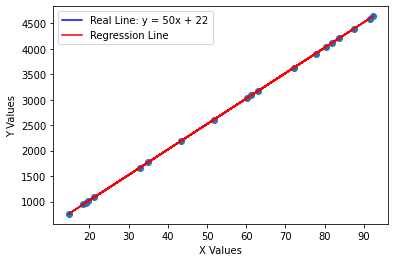

In [ ]:
### Your code here
plt.scatter(x, y)

real_line = 50 * x + 22
plt.plot(x, real_line, 'b-', label = "Real Line: y = 50x + 22")

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'r-', label = "Regression Line")

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()

plt.show

### Part 4 - Create an outlier
Double the Y value for your 10th data point.
Run your regression function again and observe how the equation to the line changes.

Slope 2:  47.89007748207241
Intercept 2:  175.48420845219243


<function matplotlib.pyplot.show(close=None, block=None)>

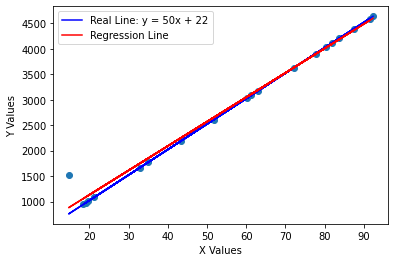

In [ ]:
### Your code here

y[9] *= 2

mean_x2 = np.mean(x)
mean_y2 = np.mean(y)
num2 = np.sum((x-mean_x2) * (y - mean_y2))
den2 = np.sum((x - mean_x2) ** 2)
slope2 = num2 / den2
intercept2 = mean_y2 - slope2 * mean_x2

print("Slope 2: ", slope2)
print("Intercept 2: ", intercept2)

plt.scatter(x, y)

real_line2 = 50 * x + 22
plt.plot(x, real_line2, 'b-', label = "Real Line: y = 50x + 22")

regression_line2 = slope2 * x + intercept2
plt.plot(x, regression_line2, 'r-', label = "Regression Line")

plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.legend()

plt.show

## Problem 2 (10 points)
### Multiple Linear Regresion
You have already demonstrate that you can implement a simple linear regression. Now we will look at a dataset that use multiple variables.
I am using data from https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv

Predict the charges based on the independent variables?
Are all the independent variables really independent? What would you do if they weren't?

I slightly modified the data to add a bit more fun.
If you go to the Kaggle site and click the Code tab, you can see sample notebooks that can help you with this problem. However, remember that I changed some of the data so it is not an exact match.

I placed the modified datafile on github and included code to pull the data into a Panda dataframe.

Train your model on 90% of the data and use the other 10% for validation. How close are the predictions? Explain how you evaluate closeness.

Explain your process for cleaning the data.

Try a few different models that do not use all the independent variables. Do some of them perform better than others?  There are techniques to determine the best subset of features to use, but they are out of scope for this class.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
dfInsurance = pd.read_csv("https://raw.githubusercontent.com/willwilson-sdsu/CS550/main/insurance_data_cs450_fa2022.csv")

In [ ]:
dfInsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


#### Data Exploration
* We don't go into depth on this in this class, so you do not need to provide an in depth exporatory data analysis. You only need to look into the data enough to determine what cleaning and transformations you need to do before creating your model



---
See how the data is stored and presented


In [ ]:
## Your Code Here
dfInsurance.shape
dfInsurance.describe



<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest    16884.924
1      18    male  33.770         1     no  southeast    1725.5523
2      28    male  33.000         3     no  southeast     4449.462
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest    3866.8552
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest   10600.5483
1334   18  female  31.920         0     no  northeast    2205.9808
1335   18  female  36.850         0     no  southeast    1629.8335
1336   21  female  25.800         0     no  southwest     2007.945
1337   61  female  29.070         0    yes  northwest   29141.3603

[1338 rows x 7 columns]>



---
Check the type of data each piece of the data is.


In [ ]:
dfInsurance.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges      object
dtype: object

In [ ]:
dfInsurance['charges'] = pd.to_numeric(dfInsurance['charges'])
dfInsurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB




---


Check if any of the data types are empty

In [ ]:
dfInsurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



---


If any of the data types are empty, remove that piece of data


In [ ]:
dfInsurance.dropna(inplace=True)
dfInsurance.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64



---


Certain values being assigned to "unknown" or "na" were causing issues with evaluating the data. To fix this issue we had to remove the data with the charges set as those.

In [ ]:
dfInsurance = dfInsurance[dfInsurance['charges'] != 'unknown']
dfInsurance = dfInsurance[dfInsurance['charges'] != 'na']




---
Make a graph to see how the data is skewed


Text(0.5, 1.0, 'Distribution of Charges')

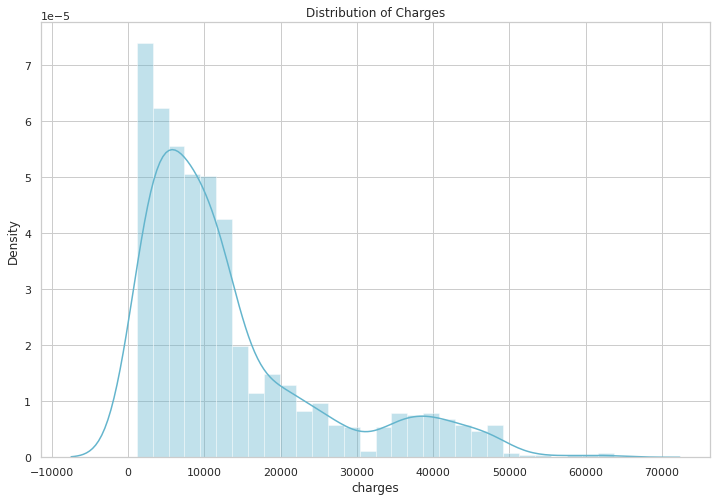

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.distplot(dfInsurance['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')



---

View charges by Region



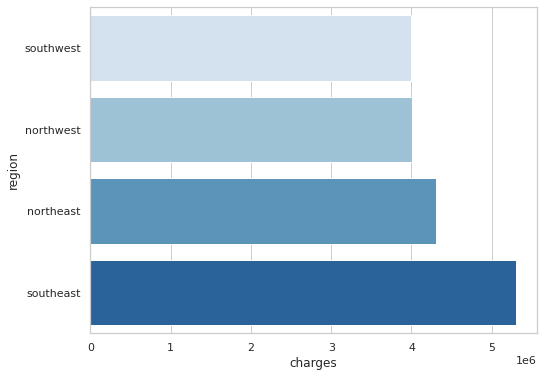

In [ ]:
charges = dfInsurance['charges'].groupby(dfInsurance.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette = 'Blues')


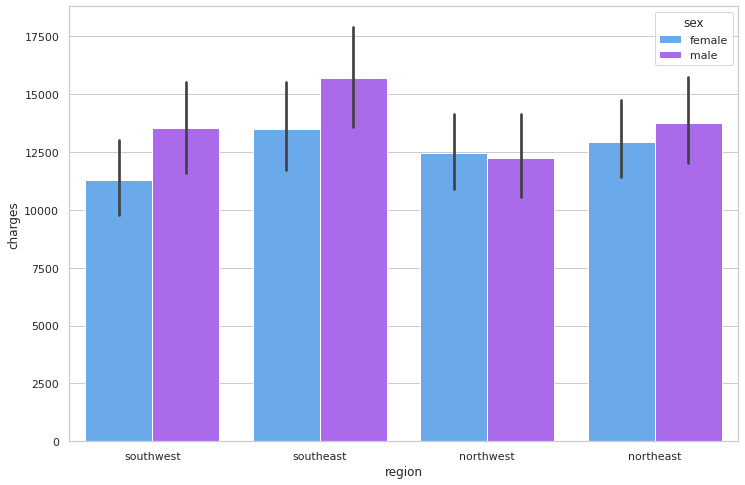

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x= 'region', y = 'charges', hue = 'sex', data = dfInsurance, palette = 'cool')

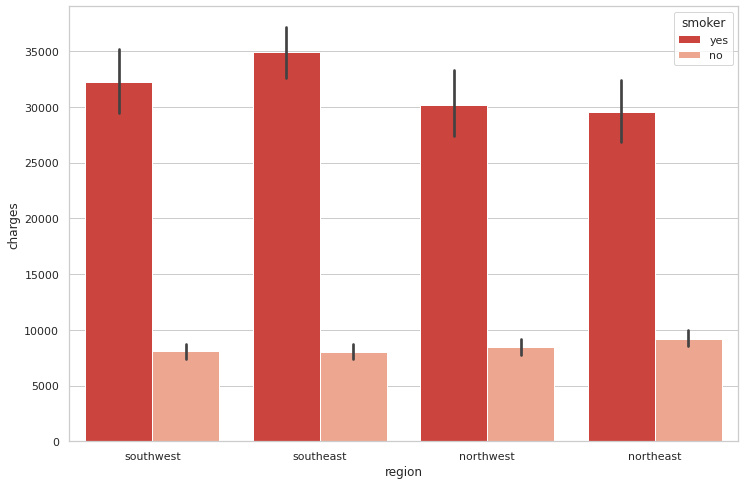

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = dfInsurance, palette = 'Reds_r')

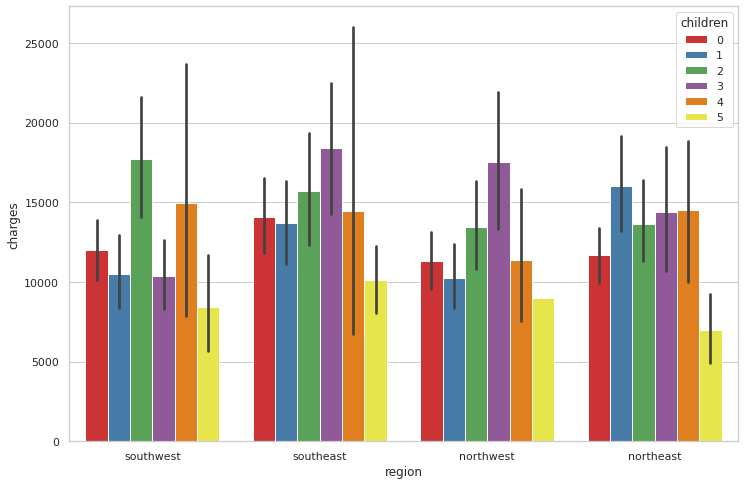

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=dfInsurance, palette='Set1')

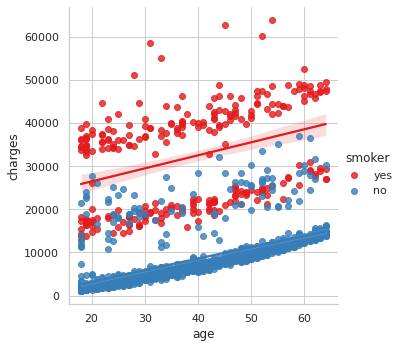

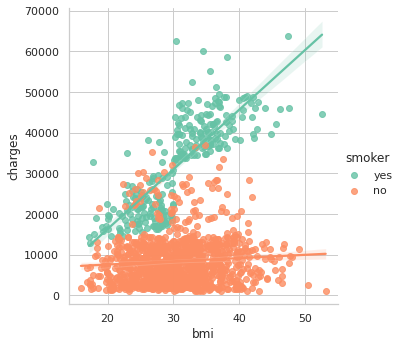

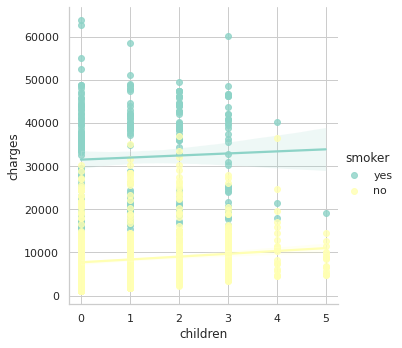

In [ ]:
ax = sns.lmplot(x = 'age', y = 'charges', data=dfInsurance, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=dfInsurance, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=dfInsurance, hue='smoker', palette='Set3')

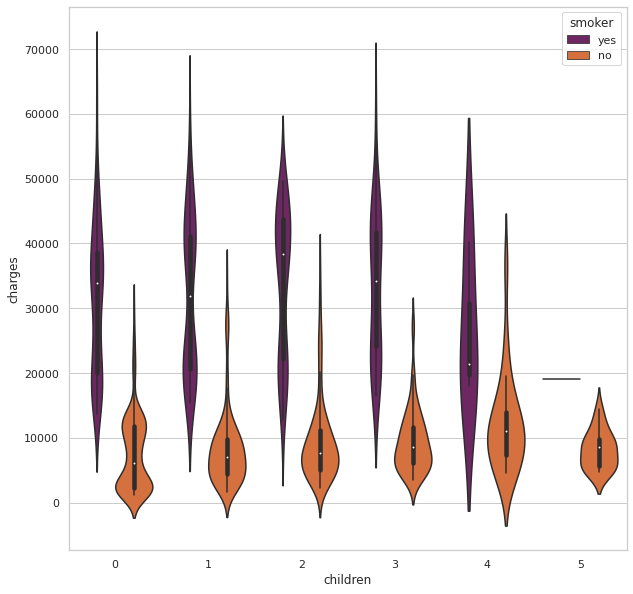

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=dfInsurance,
                 orient='v', hue='smoker', palette='inferno')

#### What did you determine from your exploration?

**EXPLAIN IN THIS BOX**

I determined that throughout all of the diffrent charts and graphs used to present and compare the data, that the highest factor you can have to increase your Medical Insurance Costs is whether or not you are a smoker. I also figured out that there are multiple pieces of data that need to be removed becuase they were not valid data for the test. The ages measured were limited to between 0 and a 100. This was in order to remove any ages that are imposibly younger than 0 or way older than 100. Also BMI's over 60 were removed because the max value of the BMI scale is 50. Also there was one piece of data from the city of San Diego. This was the only one from San Diego, so I assumed I should have removed it.

### Data Cleaning

In [ ]:
# Your code here
#Remove Any data that does not fit.
#The One person from San Diego
#The Age that is way too high or low
#The bmi that is outside the scale
dfInsurance = dfInsurance[dfInsurance['region'] != 'sandiego']
#A person cannot be over 100 years old and has to be older than 0 years old
dfInsurance = dfInsurance[dfInsurance['age'] <= 100]
dfInsurance = dfInsurance[dfInsurance['age'] >= 0]
#The bmi index usually maxes around 50. Any higher number is not valid
dfInsurance = dfInsurance[dfInsurance['bmi'] <= 60]

#### Model Generation

In [ ]:
dfInsurance[['sex', 'smoker', 'region']] = dfInsurance[['sex', 'smoker', 'region']].astype('category')
dfInsurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(dfInsurance.sex.drop_duplicates())
dfInsurance.sex = label.transform(dfInsurance.sex)
label.fit(dfInsurance.smoker.drop_duplicates())
dfInsurance.smoker = label.transform(dfInsurance.smoker)
label.fit(dfInsurance.region.drop_duplicates())
dfInsurance.region = label.transform(dfInsurance.region)
dfInsurance.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [ ]:
# Your Code Here
x = dfInsurance.drop(['charges'], axis = 1)
y = dfInsurance['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state = 0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-12173.053193341715
[ 2.63959630e+02 -8.39601491e-01  3.28015901e+02  4.83478285e+02
  2.38010609e+04 -3.75341518e+02]
0.6669834866256367


In [ ]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))


-12157.971794375884
[ 2.63900531e+02  3.28683372e+00  3.28000383e+02  4.83067251e+02
  2.37343396e+04 -3.75081361e+02]
0.6669741804854863


In [ ]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-12172.888680120006
[  263.9592332     -0.           328.00231875   483.32646421
 23799.78943323  -375.15415967]
0.6669819112478367


In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = dfInsurance.drop(['charges'], axis=1)
y = dfInsurance.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' %
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' %
      (metrics.r2_score(y_train,x_train_pred),
       metrics.r2_score(y_test,x_test_pred)))


MSE train data: 3074146.690, MSE test data: 33742312.085
R2 train data: 0.979, R2 test data: 0.764


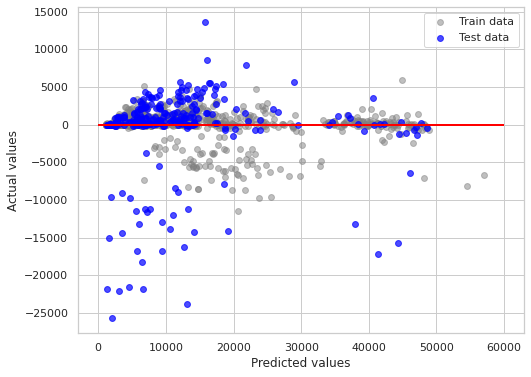

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking


1.smoker(0.637422)
2.bmi(0.199947)
3.age(0.130133)
4.children(0.016941)
5.region(0.010848)
6.sex(0.004709)


<BarContainer object of 6 artists>

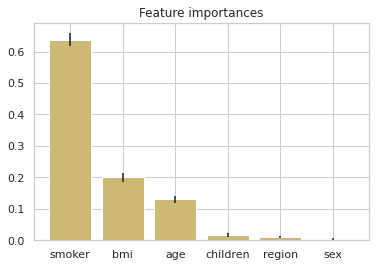

In [ ]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
x = dfInsurance.drop(['charges'], axis = 1)
y = dfInsurance.charges
# encode categorical features
categorical_features = ['sex', 'region', 'smoker']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_features)],
    remainder='passthrough')
x_encoded = preprocessor.fit_transform(x)
# create polynomial features
pol = PolynomialFeatures(degree=2)
x_pol = pol.fit_transform(x_encoded)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))




-78468941937518.9
[ 7.84689419e+13 -9.62222204e+01  9.62222204e+01  7.62574904e+01
 -1.59538435e+02 -2.15256873e+01  1.04806632e+02  3.56936950e+03
 -3.56936950e+03  7.72743903e+01  9.04067186e+02  3.09258002e+02
 -9.62222204e+01 -2.13162821e-12  5.03867803e+01 -3.06441127e+02
 -5.18268407e+02  6.78100534e+02  1.94825236e+03 -2.04447458e+03
  2.91395943e+01  4.73896126e+02  1.94964509e+02  9.62222204e+01
  2.58707101e+01  1.46902693e+02  4.96742720e+02 -5.73293902e+02
  1.62111714e+03 -1.52489492e+03  4.81347960e+01  4.30171060e+02
  1.14293493e+02  7.62574904e+01  2.27373675e-13 -4.54747351e-13
  0.00000000e+00  9.78478254e+02 -9.02220763e+02  1.05041374e+01
  2.50282569e+02  2.65295861e+02 -1.59538435e+02  0.00000000e+00
  0.00000000e+00  7.84394600e+02 -9.43933034e+02 -2.47294312e+00
  2.50086106e+02  4.95571318e+02 -2.15256873e+01  0.00000000e+00
  1.36751761e+03 -1.38904329e+03  4.00656617e+01  1.84958879e+02
  1.46270538e+02  1.04806632e+02  4.38979037e+02 -3.34172405e+02
  2.917

In [ ]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3429.3679927067674
Mean Squared Error: 32604155.167965144
Root Mean Squared Error: 5710.004830818021


In [ ]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
1296,1708.92575,2621.250000
450,7512.26700,7020.265625
463,11165.41765,12914.046875
255,13047.33235,15095.062500
1260,4544.23480,4041.078125
...,...,...
469,2201.09710,1838.890625
806,28476.73499,7254.171875
619,10713.64400,13160.328125
198,9644.25250,6372.046875


### Model Analysis

Explain your model and how you could improve it

The model that we used is Polynomial Regression, its a form of analysis in which the relationship between independen variable x and the dependent variable y is modelled as the nth degree polynomial in x. I think that as long as the outliers are accounted for there is not much to improve on the polynomial regression model.